Exercise 3 Task 1

Clusters shape: (373,)
Centers shape: (2, 2)
Unique clusters: [0 1]
Clusters shape: (373,)
Centers shape: (2, 2)
Unique clusters: [0]
Clusters shape: (373,)
Centers shape: (2, 2)
Unique clusters: [0]
K-means Accuracy: 193 Loss: 30766452.9334094 Time: 0.0025177001953125
Mountain Accuracy: 0 Loss: 26978392.490000002 Time: 0.03222179412841797
Subtractive Accuracy: 0 Loss: 27175343.0175 Time: 0.035540103912353516


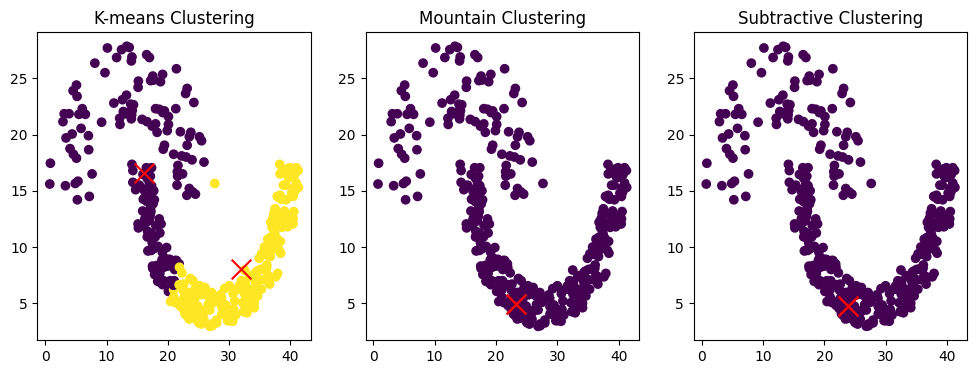

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Load and process data
with open('jain.txt', 'r') as file:
    data = np.array([line.strip().split() for line in file.readlines()], dtype=float)

# Extract coordinates and true labels
coordinates = data[:, :2]
true_labels = data[:, 2]

# Clustering algorithms
def k_means_clustering(data, k=2, max_iterations=100):
    indices = random.sample(range(data.shape[0]), k)
    centroids = data[indices, :]
    for _ in range(max_iterations):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([data[clusters == j].mean(axis=0) for j in range(k)])
        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids
    return clusters, centroids

def mountain_clustering(data, radius=1.0, max_clusters=2):
    densities = np.sum(np.exp(-np.linalg.norm(data[:, np.newaxis] - data, axis=2) ** 2 / (2 * radius ** 2)), axis=1)
    centers = []
    while len(centers) < max_clusters:
        next_center_index = np.argmax(densities)
        centers.append(data[next_center_index])
        densities -= np.exp(-np.linalg.norm(data - data[next_center_index], axis=1) ** 2 / (2 * radius ** 2))
    centers = np.array(centers)
    distances_to_centers = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    clusters = np.argmin(distances_to_centers, axis=1)
    return clusters, centers

def subtractive_clustering(data, radius=1.5, influence_radius=1.5, max_clusters=2):
    potential = np.sum(np.exp(-np.linalg.norm(data[:, np.newaxis] - data, axis=2) ** 2 / (2 * radius ** 2)), axis=1)
    centers = []
    while len(centers) < max_clusters:
        next_center_index = np.argmax(potential)
        centers.append(data[next_center_index])
        potential -= np.exp(-np.linalg.norm(data - data[next_center_index], axis=1) ** 2 / (2 * influence_radius ** 2))
    centers = np.array(centers)  # Convert to NumPy array here
    distances_to_centers = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    clusters = np.argmin(distances_to_centers, axis=1)
    return clusters, centers

# Apply those three clustering algorithms
start_time = time()
k_means_clusters, k_means_centroids = k_means_clustering(coordinates)
k_means_time = time() - start_time

start_time = time()
mountain_clusters, mountain_centers = mountain_clustering(coordinates)
mountain_time = time() - start_time

start_time = time()
subtractive_clusters, subtractive_centers = subtractive_clustering(coordinates)
subtractive_time = time() - start_time



# Calculate performance metrics
def calculate_accuracy_loss(clusters, true_labels, data, centers):
    print("Clusters shape:", clusters.shape)
    print("Centers shape:", centers.shape)
    print("Unique clusters:", np.unique(clusters))
    correct_labels = sum(clusters == true_labels)
    try:
        distances = np.linalg.norm(data[:, np.newaxis] - centers[clusters], axis=2)
        loss = np.sum(distances ** 2)
    except Exception as e:
        print(e)
        raise
    return correct_labels, loss

k_means_accuracy, k_means_loss = calculate_accuracy_loss(k_means_clusters, true_labels, coordinates, k_means_centroids)
mountain_accuracy, mountain_loss = calculate_accuracy_loss(mountain_clusters, true_labels, coordinates, mountain_centers)
subtractive_accuracy, subtractive_loss = calculate_accuracy_loss(subtractive_clusters, true_labels, coordinates, subtractive_centers)

# Print performance metrics
print("K-means Accuracy:", k_means_accuracy, "Loss:", k_means_loss, "Time:", k_means_time)
print("Mountain Accuracy:", mountain_accuracy, "Loss:", mountain_loss, "Time:", mountain_time)
print("Subtractive Accuracy:", subtractive_accuracy, "Loss:", subtractive_loss, "Time:", subtractive_time)

# Visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=k_means_clusters)
plt.scatter(k_means_centroids[:, 0], k_means_centroids[:, 1], marker='x', s=200, c='red')
plt.title("K-means Clustering")

plt.subplot(1, 3, 2)
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=mountain_clusters)
plt.scatter(mountain_centers[:, 0], mountain_centers[:, 1], marker='x', s=200, c='red')
plt.title("Mountain Clustering")

plt.subplot(1, 3, 3)
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=subtractive_clusters)
plt.scatter(subtractive_centers[:, 0], subtractive_centers[:, 1], marker='x', s=200, c='red')
plt.title("Subtractive Clustering")
plt.show()


# Performance comparison

**K-means Clustering**

Parameters: Number of clusters
k, maximum iterations.

Operation: Assigns data points to the nearest centroid, recalculates centroids based on averages of assigned points, and iterates until convergence or the maximum iterations are reached.

Performance Metrics: Depends on the initial placement of centroids. Standard parameters like
k and convergence criteria (max iterations) control the operation.

Pros and Cons:

Pro: Efficient in terms of computational cost, especially for large datasets.

Con: Sensitive to the initial placement of centroids. Performance might degrade with non-spherical clusters.


**Mountain Clustering**

Parameters: Radius for influence.

Operation: Calculates densities of data points, picks the point with the highest density as a cluster center, then reduces the density of other points based on distance to the new center.

Performance Metrics: Heavily dependent on the radius parameter, which affects how influence decreases with distance.

Pros and Cons:

Pro: Can detect clusters with irregular boundaries better than K-means.

Con: Computationally expensive due to density calculations and not scalable to very large datasets.


**Subtractive Clustering**


Parameters: Radius for influence and subtractive influence radius.

Operation: Similar to mountain clustering but considers a subtractive approach to reduce potential further away from the chosen center.
Performance Metrics: Influenced by both the radius and the subtractive influence radius.

Pros and Cons:

Pro: Good at identifying cluster centers in a data-driven manner without
specifying the number of clusters.

Con: Like mountain clustering, it's computationally intensive and may not scale well.


Exercise 3 Task 2

In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=1636c4a7d17d911cb42d186e992e73cd663300f2c851e5a788eb6a503312a935
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy



=== 2 Clusters ===
K-Means clustering results for point (3,2) across trials: [0, 1, 1, 1, 0, 0, 0, 1, 0, 1]
Fuzzy C-Means clustering results for point (3,2) across trials: [0, 1, 0, 0, 1, 1, 1, 1, 1, 1]


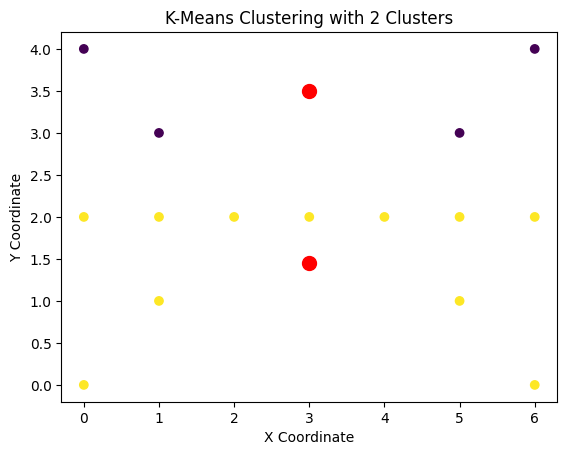

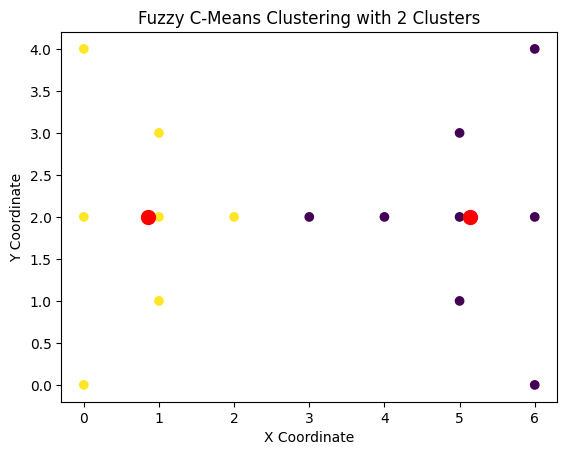


=== 3 Clusters ===
K-Means clustering results for point (3,2) across trials: [0, 1, 1, 0, 2, 0, 0, 1, 1, 0]
Fuzzy C-Means clustering results for point (3,2) across trials: [0, 2, 0, 0, 2, 2, 1, 2, 2, 2]


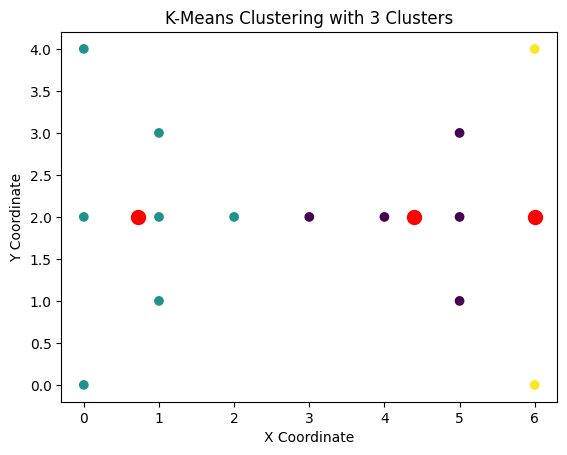

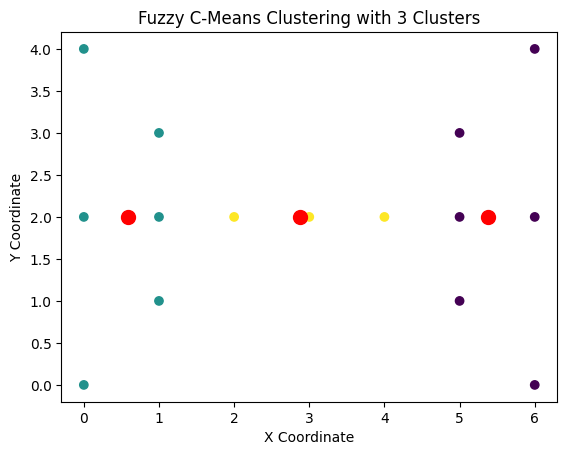

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

def k_means_clustering(data, k=2, max_iterations=100, seed=None):
    if seed is not None:
        np.random.seed(seed)
    centroids = data[np.random.choice(len(data), k, replace=False)]

    for _ in range(max_iterations):
        # Calculate distances from each point to each centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        # Assign clusters based on closest centroid
        clusters = np.argmin(distances, axis=1)

        new_centroids = np.zeros((k, data.shape[1]))
        for i in range(k):
            cluster_data = data[clusters == i]
            if cluster_data.size == 0:
                # If no points are closer to the centroid, reassign the centroid randomly
                new_centroids[i] = data[np.random.choice(len(data))]
            else:
                new_centroids[i] = cluster_data.mean(axis=0)

        # Check for convergence: if centroids do not change, exit loop
        if np.allclose(centroids, new_centroids, rtol=1e-4):
            break
        centroids = new_centroids

    return clusters, centroids

def fuzzy_c_means_clustering(data, k=2, max_iterations=1000, m=2, error=0.005, seed=None):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data.T, c=k, m=m, error=error, maxiter=max_iterations, seed=seed
    )
    cluster_membership = np.argmax(u, axis=0)
    return cluster_membership, cntr

def examine_point(data, point, clustering_function, k, trials=10):
    point_idx = np.argmin(np.linalg.norm(data - point, axis=1))
    memberships = []
    for _ in range(trials):
        clusters, _ = clustering_function(data, k=k)
        memberships.append(clusters[point_idx])
    return memberships

with open('butterfly.txt', 'r') as file:
    data = np.array([line.strip().split() for line in file.readlines()], dtype=float)

point = np.array([3, 2])

# Examine both clustering methods with 2 and 3 clusters
for num_clusters in [2, 3]:
    print(f"\n=== {num_clusters} Clusters ===")
    k_means_results = examine_point(data, point, k_means_clustering, num_clusters)
    fuzzy_results = examine_point(data, point, fuzzy_c_means_clustering, num_clusters)

    print(f"K-Means clustering results for point (3,2) across trials: {k_means_results}")
    print(f"Fuzzy C-Means clustering results for point (3,2) across trials: {fuzzy_results}")

    # Visualization for K-means
    clusters, centroids = k_means_clustering(data, k=num_clusters)
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red')
    plt.title(f'K-Means Clustering with {num_clusters} Clusters')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

    # Visualization for Fuzzy C-Means
    clusters, centroids = fuzzy_c_means_clustering(data, k=num_clusters)
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red')
    plt.title(f'Fuzzy C-Means Clustering with {num_clusters} Clusters')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


Which one would be more appropriate clustering method for this
data and setup?


With both 2 and 3 clusters the Fuzzy C-means clustering seems to be more stable. With 2 clusters there is some change between clusters 0 and 1, but the changes are less frequent compared to K-means algorithm. With 3 clusters Fuzzy c-means mainly sticks to clusters 0 and 2. K-means has more variation between these 0,1 and 2.This indicates that Fuzzy c-meas has higher consistency and is possibly more reliable algorithm out of these two. The difference between these two are however quite subtle.